# １章 ウェブの注文数を分析する１０本ノック

ここでは、ある企業のECサイトでの商品の注文数の推移を分析していきます。  
データの属性を理解し、分析をするためにデータを加工した後、  
データの可視化を行うことで問題を発見していくプロセスを学びます。

### ノック１：データを読み込んでみよう

In [33]:
# read csv
import pandas as pd
from collections import namedtuple

class Data:
    def __init__(self):
        self.customer = pd.read_csv('customer_master.csv')
        self.item = pd.read_csv('item_master.csv')
        self.transaction_1 = pd.read_csv('transaction_1.csv')
        self.transaction_2 = pd.read_csv('transaction_2.csv')
        self.transaction_detail_1 = pd.read_csv('transaction_detail_1.csv')
        self.transaction_detail_2 = pd.read_csv('transaction_detail_2.csv')
        self.transaction = pd.DataFrame()
        self.transaction_detail = pd.DataFrame()
        self.join_data = pd.DataFrame()
        self.join_master_data = pd.DataFrame()

data_of = Data()


In [34]:
# show head
def show_head(data_of):
    for name, data in vars(data_of).items():
        print('-----', name, '-----')
        display(data.head())

show_head(data_of)

----- customer -----


,customer_id,customer_name,registration_date,customer_name_kana,email,gender,age,birth,pref
0,IK152942,平田 裕次郎,2019-01-01 00:25:33,ひらた ゆうじろう,hirata_yuujirou@example.com,M,29,1990/6/10,石川県
1,TS808488,田村 詩織,2019-01-01 01:13:45,たむら しおり,tamura_shiori@example.com,F,33,1986/5/20,東京都
2,AS834628,久野 由樹,2019-01-01 02:00:14,ひさの ゆき,hisano_yuki@example.com,F,63,1956/1/2,茨城県
3,AS345469,鶴岡 薫,2019-01-01 04:48:22,つるおか かおる,tsuruoka_kaoru@example.com,M,74,1945/3/25,東京都
4,GD892565,大内 高史,2019-01-01 04:54:51,おおうち たかし,oouchi_takashi@example.com,M,54,1965/8/5,千葉県


----- item -----


,item_id,item_name,item_price
0,S001,PC-A,50000
1,S002,PC-B,85000
2,S003,PC-C,120000
3,S004,PC-D,180000
4,S005,PC-E,210000


----- transaction_1 -----


,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


----- transaction_2 -----


,transaction_id,price,payment_date,customer_id
0,T0000005113,295000,2019-06-15 07:20:27,TS169261
1,T0000005114,50000,2019-06-15 07:35:47,HI599892
2,T0000005115,85000,2019-06-15 07:56:36,HI421757
3,T0000005116,50000,2019-06-15 08:40:55,OA386378
4,T0000005117,120000,2019-06-15 08:44:23,TS506913


----- transaction_detail_1 -----


,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


----- transaction_detail_2 -----


,detail_id,transaction_id,item_id,quantity
0,5000,T0000004870,S002,3
1,5001,T0000004871,S003,1
2,5002,T0000004872,S001,2
3,5003,T0000004873,S004,1
4,5004,T0000004874,S003,2


----- transaction -----


""


----- transaction_detail -----


""


----- join_data -----


""


----- join_master_data -----


""


### ノック２：データを結合(ユニオン)してみよう

In [36]:
data_of.transaction = pd.concat([data_of.transaction_1, data_of.transaction_2])
data_of.transaction_detail = pd.concat([data_of.transaction_detail_1, data_of.transaction_detail_2])
display(data_of.transaction.head())
display(data_of.transaction_detail.head())

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


### ノック３：売上データ同士を結合(ジョイン)してみよう

In [24]:
data_of.join_data = pd.merge(data_of.transaction_detail, data_of.transaction.drop(['price'], axis=1), on='transaction_id', how = 'left')
data_of.join_data.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865


### ノック４：マスタデータを結合(ジョイン)してみよう

In [25]:
data_of.join_data = pd.merge(data_of.join_data,
                             data_of.customer,
                             on='customer_id',
                             how='left')
data_of.join_data = pd.merge(data_of.join_data,
                             data_of.item,
                             on = 'item_id',
                             how = 'left')
data_of.join_data.head()


,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,customer_name,registration_date,customer_name_kana,email,gender,age,birth,pref,item_name,item_price
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,井本 芳正,2019-01-07 14:34:35,いもと よしまさ,imoto_yoshimasa@example.com,M,30,1989/7/15,熊本県,PC-E,210000
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,三船 六郎,2019-01-27 18:00:11,みふね ろくろう,mifune_rokurou@example.com,M,73,1945/11/29,京都府,PC-A,50000
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,山根 小雁,2019-01-11 08:16:02,やまね こがん,yamane_kogan@example.com,M,42,1977/5/17,茨城県,PC-C,120000
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,池田 菜摘,2019-01-10 05:07:38,いけだ なつみ,ikeda_natsumi@example.com,F,47,1972/3/17,兵庫県,PC-E,210000
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,栗田 憲一,2019-01-25 06:46:05,くりた けんいち,kurita_kenichi@example.com,M,74,1944/12/17,長崎県,PC-B,85000


### ノック5：必要なデータ列を作ろう

In [26]:
data_of.join_data['price'] = data_of.join_data['quantity'] * data_of.join_data['item_price']
data_of.join_data[['quantity', 'item_price', 'price']].head()

,quantity,item_price,price
0,1,210000,210000
1,1,50000,50000
2,1,120000,120000
3,1,210000,210000
4,2,85000,170000


### ノック6：データ検算をしよう

In [27]:
def check(data_of: Data):
    check1 = data_of.join_data.price.sum()
    check2 = data_of.transaction.price.sum()
    print(check1, check2)
    if check1 == check2:
        print('Yes')
    else:
        print('No')

check(data_of)

971135000 971135000
Yes


### ノック7：各種統計量を把握しよう

In [28]:
data_of.join_data.isnull().sum()

detail_id             0
transaction_id        0
item_id               0
quantity              0
payment_date          0
customer_id           0
customer_name         0
registration_date     0
customer_name_kana    0
email                 0
gender                0
age                   0
birth                 0
pref                  0
item_name             0
item_price            0
price                 0
dtype: int64

In [29]:
data_of.join_data.describe()

,detail_id,quantity,age,item_price,price
count,7144.000000,7144.000000,7144.000000,7144.000000,7144.000000
mean,3571.500000,1.199888,50.265677,121698.628219,135937.150056
std,2062.439494,0.513647,17.190314,64571.311830,68511.453297
min,0.000000,1.000000,20.000000,50000.000000,50000.000000
25%,1785.750000,1.000000,36.000000,50000.000000,85000.000000
50%,3571.500000,1.000000,50.000000,102500.000000,120000.000000
75%,5357.250000,1.000000,65.000000,187500.000000,210000.000000
max,7143.000000,4.000000,80.000000,210000.000000,420000.000000


In [32]:
display(data_of.join_data['payment_date'].max())
display(data_of.join_data['payment_date'].min())

'2019-07-31 23:41:38'

'2019-02-01 01:36:57'

### ノック8：月別でデータを集計してみよう

In [15]:
data_of.join_data['payment_date'] = pd.to_datetime(data_of.join_data['payment_date'])
data_of.join_data['payment_month'] = data_of.join_data['payment_date'].dt.strftime('%Y-%m')
data_of.join_data.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,customer_name,registration_date,customer_name_kana,email,gender,age,birth,pref,item_name,item_price,price,payment_month
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,井本 芳正,2019-01-07 14:34:35,いもと よしまさ,imoto_yoshimasa@example.com,M,30,1989/7/15,熊本県,PC-E,210000,210000,2019-02
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,三船 六郎,2019-01-27 18:00:11,みふね ろくろう,mifune_rokurou@example.com,M,73,1945/11/29,京都府,PC-A,50000,50000,2019-02
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,山根 小雁,2019-01-11 08:16:02,やまね こがん,yamane_kogan@example.com,M,42,1977/5/17,茨城県,PC-C,120000,120000,2019-02
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,池田 菜摘,2019-01-10 05:07:38,いけだ なつみ,ikeda_natsumi@example.com,F,47,1972/3/17,兵庫県,PC-E,210000,210000,2019-02
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,栗田 憲一,2019-01-25 06:46:05,くりた けんいち,kurita_kenichi@example.com,M,74,1944/12/17,長崎県,PC-B,85000,170000,2019-02


In [17]:
data_of.join_data.groupby('payment_month')['price'].sum()

payment_month
2019-02    160185000
2019-03    160370000
2019-04    160510000
2019-05    155420000
2019-06    164030000
2019-07    170620000
Name: price, dtype: int64

### ノック9：月別、商品別でデータを集計してみよう

In [38]:
data_of.join_data.groupby(['payment_month', 'item_name'])[['price', 'quantity']].sum()

price  quantity
payment_month item_name                    
201902        PC-A       24150000       483
              PC-B       25245000       297
              PC-C       19800000       165
              PC-D       31140000       173
              PC-E       59850000       285
201903        PC-A       26000000       520
              PC-B       25500000       300
              PC-C       19080000       159
              PC-D       25740000       143
              PC-E       64050000       305
201904        PC-A       25900000       518
              PC-B       23460000       276
              PC-C       21960000       183
              PC-D       24300000       135
              PC-E       64890000       309
201905        PC-A       24850000       497
              PC-B       25330000       298
              PC-C       20520000       171
              PC-D       25920000       144
              PC-E       58800000       280
201906        PC-A       26000000       520
              PC-B       23970000       282
              PC-C       21840000       182
              PC-D       28800000       160
              PC-E       63420000       302
201907        PC-A       25250000       505
              PC-B       28220000       332
              PC-C       19440000       162
              PC-D       26100000       145
              PC-E       71610000       341

### ノック10：商品別の売上推移を可視化してみよう

In [18]:
piv_dat = data_of.join_data.pivot_table(index='payment_month', columns='item_name', values='price', aggfunc='sum')
piv_dat

item_name,PC-A,PC-B,PC-C,PC-D,PC-E
payment_month,,,,,
2019-02,24150000,25245000,19800000,31140000,59850000
2019-03,26000000,25500000,19080000,25740000,64050000
2019-04,25900000,23460000,21960000,24300000,64890000
2019-05,24850000,25330000,20520000,25920000,58800000
2019-06,26000000,23970000,21840000,28800000,63420000
2019-07,25250000,28220000,19440000,26100000,71610000


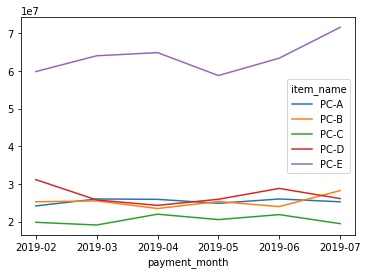

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_graph(piv_dat):
    piv_dat.plot()
    plt.show()

show_graph(piv_dat)